In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

In [110]:
single_familiy_home_transactions = pd.read_csv("total_dataset_efh_en.csv") #
apartment_transactions = pd.read_csv("total_dataset_STW_en.csv")
total_house_stock= pd.read_csv("total_dataset_GWR.csv")

In [127]:
hexbin =  geopandas.read_file("Hexbins_1sqkm/Hexbins.shp")

In [130]:
hexbin.head()

,GRID_ID,geometry
0,Z-56,"POLYGON ((2692820.312072754 1223895.18609621, ..."
1,AA-56,"POLYGON ((2693750.916870121 1223357.901123043,..."
2,AB-56,"POLYGON ((2694681.521911625 1223895.18609621, ..."
3,AC-56,"POLYGON ((2695612.126708984 1223357.901123043,..."
4,W-55,"POLYGON ((2690028.497497562 1224432.470886234,..."


In [131]:
hexbin.crs

{'ellps': 'bessel',
 'k_0': 1,
 'lat_0': 46.95240555555556,
 'lon_0': 7.439583333333333,
 'no_defs': True,
 'proj': 'somerc',
 'units': 'm',
 'x_0': 2600000,
 'y_0': 1200000}

<IPython.core.display.Javascript object>


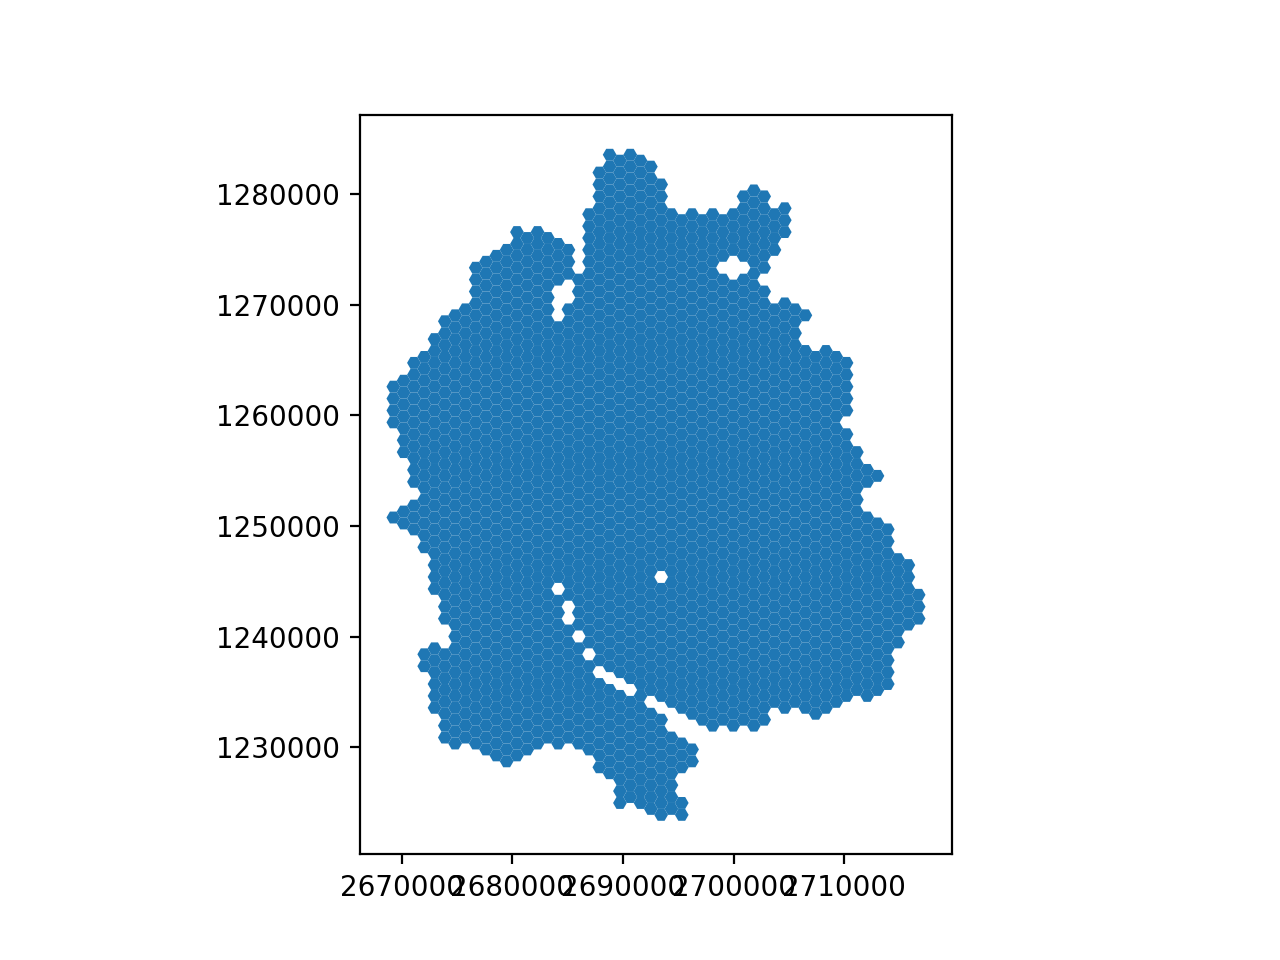

In [118]:
%matplotlib notebook

hexbin.plot()

## For single family homes

Let us find out which hexbins have the highest number of rooms, remember that status tells us about whether it is the real hexbin or not

In [42]:
single_familiy_home_transactions.dtypes.to_frame()

,0
Unnamed: 0,int64
GRID_ID,object
year,int64
recordid,int64
condemned_building,int64
cat_construction_year,object
cat_n_rooms,object
cat_living_area,object
cat_property_area,object
status,int64


In [62]:
single_familiy_home_transactions.isnull().sum().to_frame()

,0
Unnamed: 0,0
GRID_ID,0
year,0
recordid,0
condemned_building,0
cat_construction_year,414
cat_n_rooms,801
cat_living_area,1398
cat_property_area,0
status,0


So there are no 'NA's in `recordid`, showing that there are no hexagons with zero transactions, we do value counts on unique `recordid` value counts, which then allows us to 

In [113]:
single_familiy_home_transactions['GRID_ID'].value_counts().head(5)

AD-20    80
Z-18     72
K-38     72
AC-51    66
AJ-19    65
Name: GRID_ID, dtype: int64

From this, we have the right to the 

In [106]:
single_familiy_home_transactions.dropna().groupby(["status"]).size()

status
1    10411
2       29
4        9
dtype: int64

In [132]:
single_familiy_home_transactions

,Unnamed: 0,GRID_ID,year,recordid,condemned_building,cat_construction_year,cat_n_rooms,cat_living_area,cat_property_area,status
0,1163,X-55,2010,2221,0,-1850,6,181-230,1101+,1
1,1164,Z-55,2010,781,0,-1850,5,NaN,201-350,1
2,1165,Z-55,2010,2197,0,1991-2000,5,121-150,351-500,1
3,1166,Z-55,2010,2224,0,-1850,7,121-150,501-700,1
4,1167,AB-53,2010,455,0,NaN,NaN,NaN,501-700,1
5,1168,AC-52,2010,1843,0,1951-1960,4,91-120,1101+,1
6,1169,AC-52,2010,406,0,NaN,7,231+,701-1100,1
7,1170,AC-52,2010,1173,0,NaN,NaN,NaN,701-1100,1
8,1171,AD-52,2010,777,0,2001-2010,6,181-230,351-500,1
9,1172,AD-52,2010,891,0,2001-2010,6,181-230,351-500,1


## For apartments

The same for apartments

In [32]:
apartment_transactions.cat_n_rooms.unique()

array(['5', nan, '3', '4', '2', '6', '7+', '1'], dtype=object)

In [34]:
apartment_transactions.sort_values(by='cat_n_rooms',ascending='False').head()

,Unnamed: 0,GRID_ID,year,recordid,condemned_building,cat_contruction_year,cat_n_rooms,n_apartments_building,status,gkat,not_built
12392,15953,AD-22,2012,1015,0,1971-1980,1,18.0,1,1025.0,0.0
20134,26005,O-34,2014,3575,0,1971-1980,1,80.0,1,1030.0,0.0
15709,20807,N-34,2013,4436,0,1926-1950,1,10.0,1,1030.0,0.0
11158,14498,AQ-34,2012,1969,0,1981-1990,1,11.0,1,1025.0,0.0
15698,20796,K-34,2013,3496,0,1971-1980,1,18.0,1,1025.0,0.0


In [107]:
apartment_transactions.dropna().groupby(["status"]).size()

status
1    7608
dtype: int64

In [139]:
apartment_transactions[apartment_transactions['status']==2]

,Unnamed: 0,GRID_ID,year,recordid,condemned_building,cat_contruction_year,cat_n_rooms,n_apartments_building,status,gkat,not_built
8792,11349,E-24,2011,3503,0,2001-2010,NaN,NaN,2,NaN,0.0
17923,23021,E-24,2013,3252,0,2001-2010,NaN,NaN,2,NaN,0.0


In [140]:
single_familiy_home_transactions[single_familiy_home_transactions['status']==2]

,Unnamed: 0,GRID_ID,year,recordid,condemned_building,cat_construction_year,cat_n_rooms,cat_living_area,cat_property_area,status
2570,3733,D-29,2010,966,0,1971-1980,6,NaN,701-1100,2
2571,3734,D-29,2010,1138,0,1971-1980,5,121-150,1101+,2
2572,3735,Z-45,2010,740,0,1951-1960,NaN,NaN,1101+,2
2573,3736,AT-44,2010,2403,0,-1850,6,-90,1101+,2
2574,3737,AT-44,2010,2164,0,1901-1925,-3,121-150,-200,2
2575,3738,AE-37,2010,62,0,1991-2000,6,121-150,351-500,2
2576,3739,AI-31,2010,497,0,1926-1950,5,NaN,1101+,2
2577,3740,D-22,2010,2381,0,1991-2000,-3,-90,1101+,2
2578,3741,AJ-19,2010,1224,0,NaN,NaN,NaN,501-700,2
5061,7387,Z-55,2011,830,0,-1850,5,231+,1101+,2
